In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [17]:
asset_info = '''
Banco do Brasil S.A. (BBAS3.SA)
Sao Paolo - Sao Paolo Delayed Price. Currency in BRL.
Source: https://finance.yahoo.com/quote/BBAS3.SA
'''

In [26]:
# useful functions
# ================
def total_return(prices):
    """Retuns the return between the first and last value of the DataFrame.

    Parameters
    ----------
    prices : pandas.Series or pandas.DataFrame

    Returns
    -------
    total_return : float or pandas.Series
        Depending on the input passed returns a float or a pandas.Series.
    """
    return (prices.iloc[-1] / prices.iloc[0] - 1)


def total_return_from_returns(returns):
    """Retuns the return between the first and last value of the DataFrame.

    Parameters
    ----------
    returns : pandas.Series or pandas.DataFrame

    Returns
    -------
    total_return : float or pandas.Series
        Depending on the input passed returns a float or a pandas.Series.
    """
    return (returns + 1).prod() - 1

#def return_calc(rCap,rFloor,rAdjReturn):
#    return (if rAdjReturn > .15: return .15
 #               elif rAdjReturn < 0.0001 : return 0.05
  #              else : return rAdjReturn)

def plot_this(df, title, figsize=None, ylabel='',
             output_file='imgs/fig.png', bottom_adj=0.25,
             txt_ymin=-0.4, bar=False):
    if bar:
        ax = df.plot.bar(title=title, figsize=figsize)
    else:
        ax = df.plot(title=title, figsize=figsize)
    sns.despine()
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.text(0, txt_ymin, asset_info, transform=ax.transAxes, fontsize=9)
    plt.gcf().subplots_adjust(bottom=bottom_adj)
    plt.savefig(output_file, **kw_save)

In [5]:
## SP500 contains the monthly datasets for S&P figures

#sp_data = pd.read_csv('sp500.csv')
sp_data = pd.read_csv('sp500.csv',
                      header=0,
                      names=['timepoint','open','high','low','close','adjclose','volume'],
                      parse_dates=True,index_col=0)

#sp_data_adjclose = sp_data[['Date','Adj Close']]

#sp_data_adjclose = sp_data_adjclose.astype({"Date":dt.date,"Adj Close":np.float})

print(sp_data.columns)

sp_data.describe()

#print(sp_data_adjclose.columns)

Index(['open', 'high', 'low', 'close', 'adjclose', 'volume'], dtype='object')


,open,high,low,close,adjclose,volume
count,7274.000000,7274.000000,7274.000000,7274.000000,7274.000000,7.274000e+03
mean,1203.299483,1210.293744,1195.826012,1203.553540,1203.553540,2.130960e+09
std,602.232272,604.422513,599.807315,602.228652,602.228652,1.764898e+09
min,295.450012,301.450012,294.510010,295.459991,295.459991,1.499000e+07
25%,770.550019,777.917481,763.404984,770.167496,770.167496,4.866900e+08
50%,1173.785034,1182.054993,1165.660034,1173.815002,1173.815002,1.546375e+09
75%,1439.007507,1449.200012,1430.515015,1439.617462,1439.617462,3.505905e+09
max,2936.760010,2940.909912,2927.110107,2930.750000,2930.750000,1.145623e+10


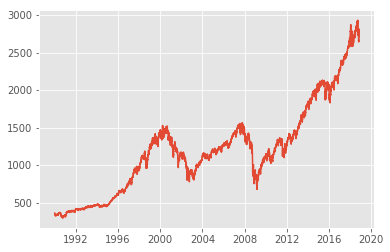

In [15]:
start = dt.datetime(1995,1,1)
end = dt.datetime(2018,1,1)

sp_data['year'] = sp_data.index.year
sp_data['month'] = sp_data.index.month
sp_data['day'] = sp_data.index.day


#print(sp_data)

plt.plot(sp_data['adjclose'], label='Adj Close')

In [21]:
plt.show()

In [30]:
approach1 = sp_data
approach1['adjclosereturn']= approach1['adjclose'].pct_change()
#approach1 = sp_data.groupby(['year','month','day'], )['adjclose'].apply(total_return)



#print(approach1.dtype[0])
#approach1['capreturn'] = approach1.apply(lambda row: '.15' if row['adjclose'] > '.15' else (row['adjclose'] if row['adjclose'] > '0.0001' else '0.0001') )
#approach1['capreturn'] = approach1.apply(lambda row: .15*row['adjclose'],axis=1)

approach1.head(300)
#approach1.tail(300)
#plot_this(approach1, bar=True, title='Trailing returns: Approach 1',
 #         ylabel='Returns (parts per unit)', txt_ymin=-0.4, bottom_adj=0.25,
     #     output_file='imgs/fig_rets_approach1.png')

,open,high,low,close,adjclose,volume,year,month,day,adjclosereturn
timepoint,,,,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,359.690002,162070000,1990,1,2,NaN
1990-01-03,359.690002,360.589996,357.890015,358.760010,358.760010,192330000,1990,1,3,-0.002586
1990-01-04,358.760010,358.760010,352.890015,355.670013,355.670013,177000000,1990,1,4,-0.008613
1990-01-05,355.670013,355.670013,351.350006,352.200012,352.200012,158530000,1990,1,5,-0.009756
1990-01-08,352.200012,354.239990,350.540009,353.790009,353.790009,140110000,1990,1,8,0.004514
1990-01-09,353.829987,354.170013,349.609985,349.619995,349.619995,155210000,1990,1,9,-0.011787
1990-01-10,349.619995,349.619995,344.320007,347.309998,347.309998,175990000,1990,1,10,-0.006607
1990-01-11,347.309998,350.140015,347.309998,348.529999,348.529999,154390000,1990,1,11,0.003513
1990-01-12,348.529999,348.529999,339.489990,339.929993,339.929993,183880000,1990,1,12,-0.024675


In [ ]:
plt.plot (approach1)

#plot_this(approach1, bar=True, title='Trailing returns: Approach 1',
 #         ylabel='Returns (parts per unit)', txt_ymin=-0.4, bottom_adj=0.25,
  #        output_file='./imgs/fig_rets_approach1.png')

In [ ]:
plt.show()